In [15]:
import typing

import torch
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import omegaconf

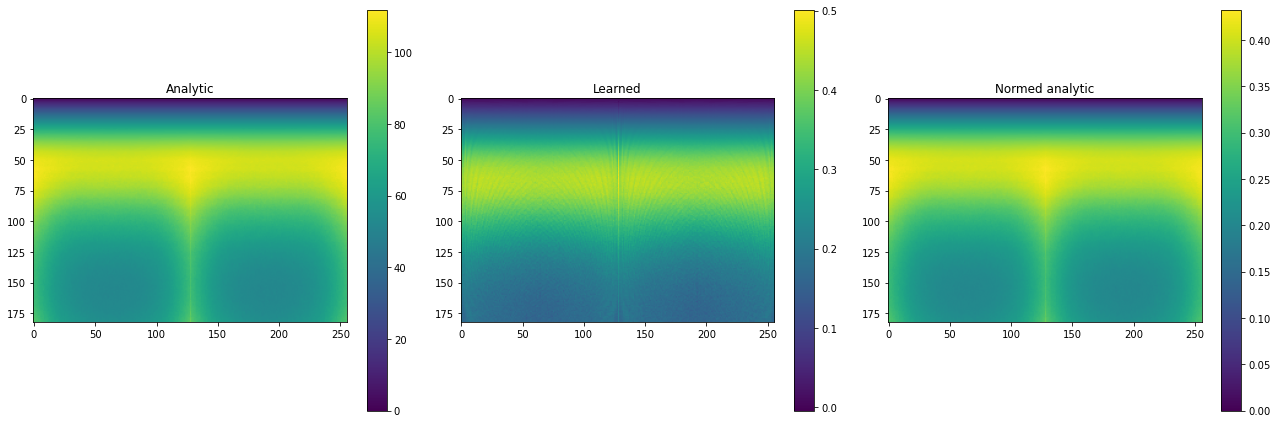

In [5]:
analytic = torch.load("runs/analytic_filter/noise_level=1.0/coefficients.pt", map_location="cpu").detach()
learned = torch.load("runs/learned_filter/noise_level=1.0/coefficients.pt", map_location="cpu").detach()
plt.subplots(1,3,figsize=(18,6))
plt.subplot(1,3,1)
plt.title("Analytic")
plt.imshow(analytic.mT)
plt.colorbar()
plt.subplot(1,3,2)
plt.title("Learned")
plt.imshow(learned.mT)
plt.colorbar()
plt.subplot(1,3,3)
plt.title("Normed analytic")
plt.imshow((analytic*(torch.sum(learned*analytic)/torch.sum(analytic**2))).mT)
plt.colorbar()
plt.tight_layout()
plt.show()

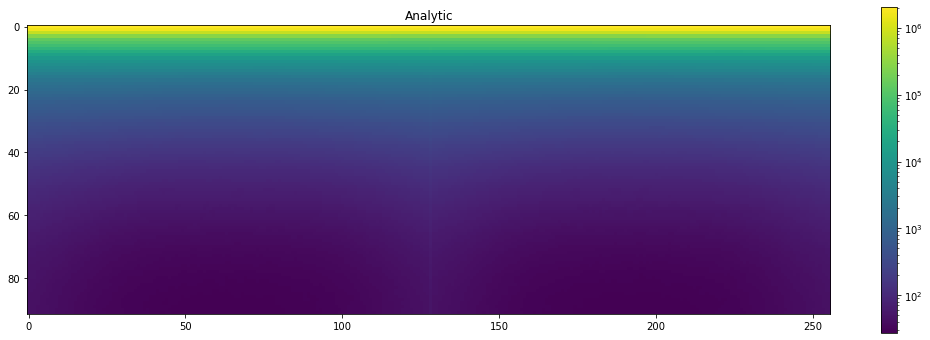

In [16]:
pi = torch.load("runs/circle_ellipses/dataset.img_size=128, model=analytic/pi.pt", map_location="cpu").detach()
plt.figure(figsize=(18,6))
plt.title("Analytic")
plt.imshow(pi.mT, norm=colors.LogNorm())
plt.colorbar()
plt.show()

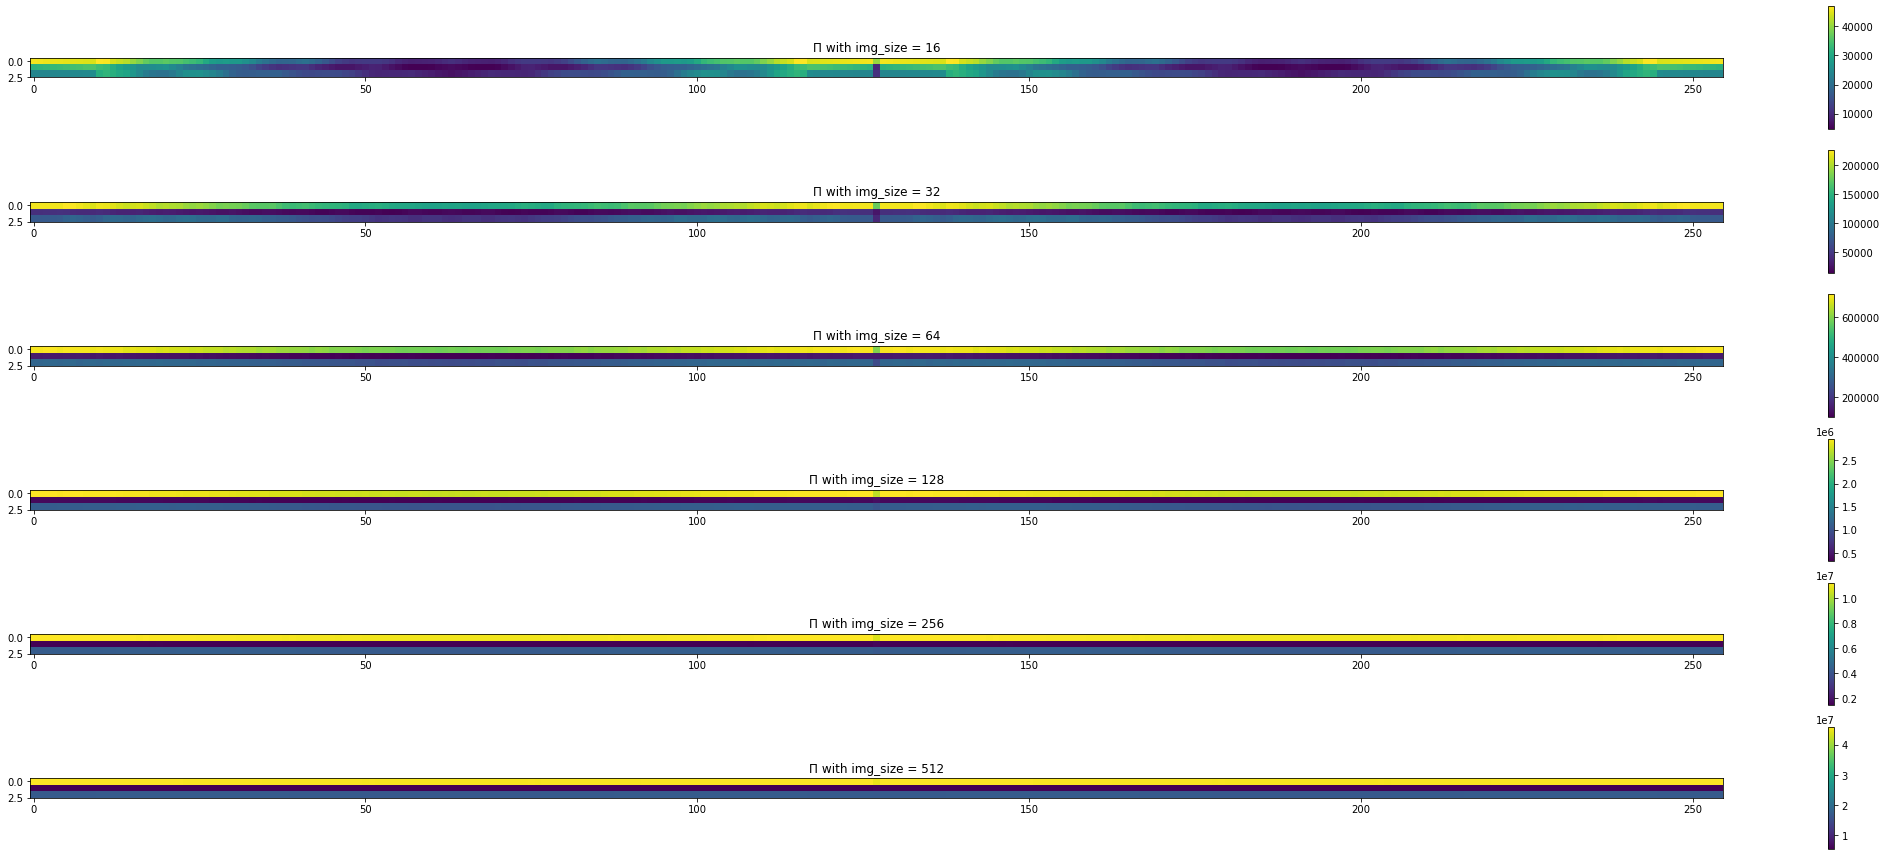

In [19]:
plt.subplots(6,1,figsize=(30,12))
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.title(f"Π with img_size = {2**(4+i)}")
    pi = torch.load(f"runs/model_resolution_artifacts/dataset.img_size={2**(4+i)}, model=analytic/pi.pt", map_location="cpu").detach()
    pi = pi[1:,2:5]
    plt.imshow(pi.mT)
    plt.colorbar()
plt.tight_layout()
plt.show()

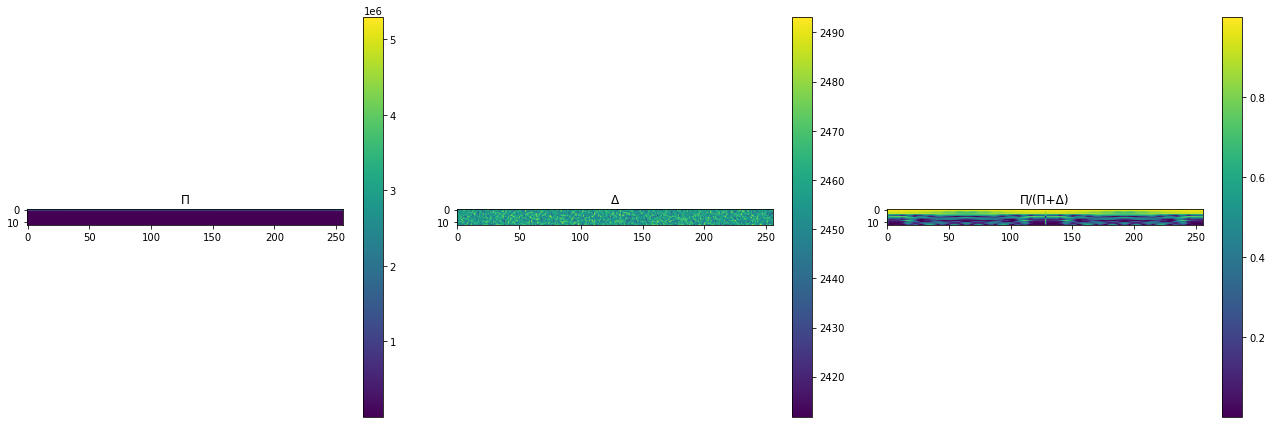

In [7]:
pi = torch.load("runs/circle_analytic/dataset.img_size=16, model=analytic/pi.pt", map_location="cpu").detach()
delta = torch.load("runs/circle_analytic/dataset.img_size=16, model=analytic/delta.pt", map_location="cpu").detach()

plt.subplots(1,3,figsize=(18,6))
plt.subplot(1,3,1)
plt.title("Π")
plt.imshow(pi.mT)
plt.colorbar()
plt.subplot(1,3,2)
plt.title("Δ")
plt.imshow(delta.mT)
plt.colorbar()
plt.subplot(1,3,3)
plt.title("Π/(Π+Δ)")
plt.imshow((pi/(pi+delta)).mT)
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
edmi = iter(EllipsesDataModule(typing.cast(omegaconf.DictConfig, type("FakeDictConfig", (object,), {
    "training_batch_count": 100,
    "training_batch_size": 32,
    "drop_last_training_batch": True,
    "shuffle_training_data": True,
    "num_workers": 0,
    "dataset": typing.cast(omegaconf.DictConfig, type("FakeDictConfig", (object,), {
        "name": "ellipses",
        "img_size": 256,
        "ellipse_count": 10,
        "ellipse_size": 50,
        "ellipse_size_min": 10
    })),
}))).train_dataloader())
matplotlib.use("qt5agg")
plt.figure()
plt.title("Ellipses example")
plt.imshow(next(edmi)[0][0,0], interpolation="nearest", cmap="gray")
plt.colorbar()
plt.tight_layout()
plt.show()
matplotlib.use("agg")